In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import utils
from generator import Generator
import numpy as np
import matplotlib.pyplot as plt

# CIFAR

#### Create an object of class Generator
The Generator class contains functionality to help generate adversarial images, such as
- Generate adversarial images for a batch with the fool() method
- Experiment with the parameters of the fool() method with the fool_calibrate() method
- Visualize generated adversarial images from a random batch with _visualize() method, which is located inside fool_calibrate()

In [ ]:
cifar_adv = Generator('cifar')

In [ ]:
cifar_adv.fool_calibrate(target=5, epsilon=5e-3, num_iters=40, verbose=True)
# Try adjusting the epsilon parameter above; it's set to a really high number to
# make the adversarial images easily distinguishable to the human eye

# MNIST

In [3]:
mnist_adv = Generator('mnist')

Target = 5
Took 2.91 seconds
Number in batch that model successfully predicts: 46/50
Number that terminated before max number of iterations: 19/50
Number successfully fooled: 21/50
Number with small enough perturbation: 21/50



Original Label: 4
Model prediction: 5


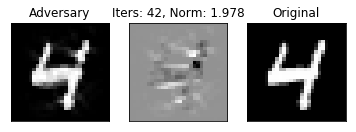



Original Label: 6
Model prediction: 5


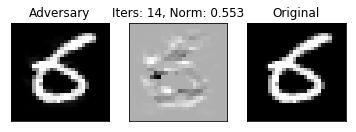



Original Label: 7
Model prediction: 5


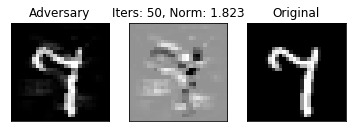



Original Label: 0
Model prediction: 5


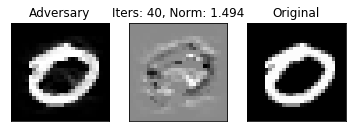



Original Label: 3
Model prediction: 5


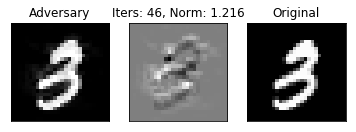



Original Label: 9
Model prediction: 5


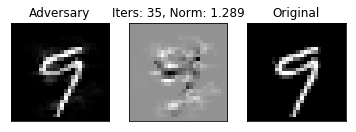



Original Label: 2
Model prediction: 5


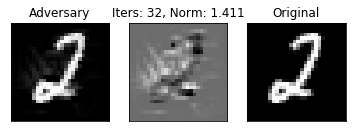



Original Label: 7
Model prediction: 5


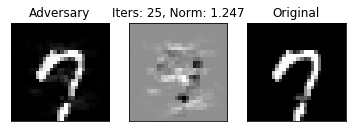



Original Label: 3
Model prediction: 5


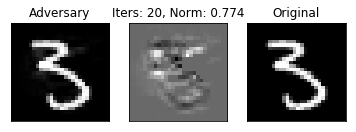



Original Label: 2
Model prediction: 5


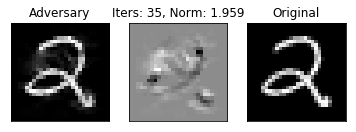



Original Label: 4
Model prediction: 5


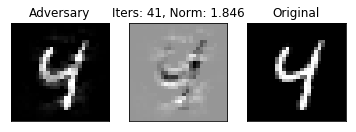



Original Label: 0
Model prediction: 5


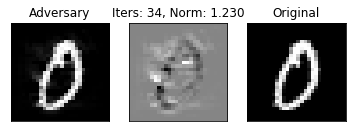



Original Label: 0
Model prediction: 5


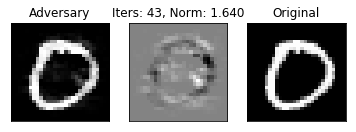



Original Label: 6
Model prediction: 5


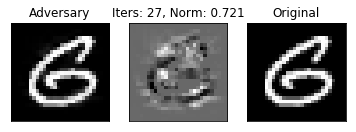



Original Label: 9
Model prediction: 5


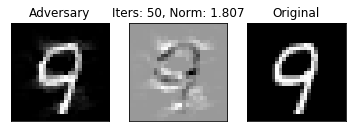



Original Label: 9
Model prediction: 5


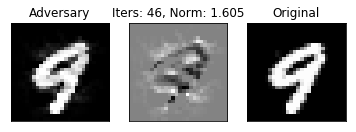



Original Label: 3
Model prediction: 5


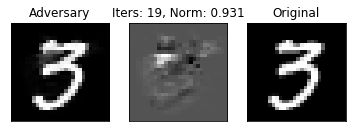



Original Label: 4
Model prediction: 5


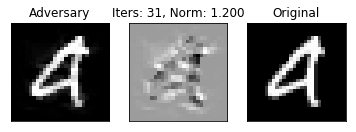



Original Label: 0
Model prediction: 5


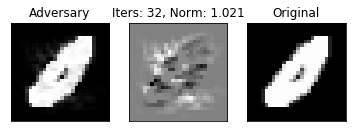



Original Label: 3
Model prediction: 5


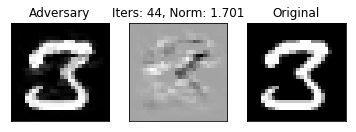



Original Label: 0
Model prediction: 5


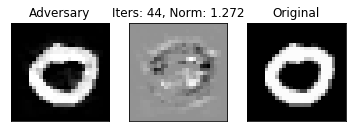

In [4]:
target = np.random.randint(0,10,1).item()
print('Target = {}'.format(target))
mnist_adv.fool_calibrate(target=target, epsilon=5e-3, num_iters=50, max_L2_norm=2.0, verbose=True)

# Create a dataset of adversarial images
The make_dataset() method inside the Adversarial_utils class will create a dataset of adversarial images. The data stored will contained the following for each example:
- The original image
- The perturbation added to the image
- The adversarial image
- The original label for the image
- The label for the class that the model gets tricked into predicting

#### MNIST

In [5]:
file_name = 'mnist_eps_5e-3_norm_2_num_iters_50'
mnist_adv.make_dataset(file_name, num_examples=10000, num_iters=50, epsilon=5e-3, max_L2_norm=2.0)

Starting first batch...
Finished batch 1. Generated 13.60/10000 images. Time elapsed: 0.5 minutes
Finished batch 2. Generated 30.50/10000 images. Time elapsed: 1.0 minutes
Finished batch 3. Generated 47.40/10000 images. Time elapsed: 1.4 minutes
Finished batch 4. Generated 65.40/10000 images. Time elapsed: 1.8 minutes
Finished batch 5. Generated 81.70/10000 images. Time elapsed: 2.3 minutes
Finished batch 6. Generated 99.20/10000 images. Time elapsed: 2.7 minutes
Finished batch 7. Generated 116.00/10000 images. Time elapsed: 3.2 minutes
Finished batch 8. Generated 132.40/10000 images. Time elapsed: 3.6 minutes
Finished batch 9. Generated 149.40/10000 images. Time elapsed: 4.0 minutes
Finished batch 10. Generated 167.10/10000 images. Time elapsed: 4.5 minutes
Finished batch 11. Generated 183.90/10000 images. Time elapsed: 4.9 minutes
Finished batch 12. Generated 199.50/10000 images. Time elapsed: 5.4 minutes
Finished batch 13. Generated 216.10/10000 images. Time elapsed: 5.8 minutes
Fin

Finished batch 107. Generated 1750.40/10000 images. Time elapsed: 46.9 minutes
Finished batch 108. Generated 1767.20/10000 images. Time elapsed: 47.4 minutes
Finished batch 109. Generated 1784.60/10000 images. Time elapsed: 47.9 minutes
Finished batch 110. Generated 1799.90/10000 images. Time elapsed: 48.3 minutes
Finished batch 111. Generated 1820.40/10000 images. Time elapsed: 48.7 minutes
Finished batch 112. Generated 1835.50/10000 images. Time elapsed: 49.2 minutes
Finished batch 113. Generated 1852.20/10000 images. Time elapsed: 49.6 minutes
Finished batch 114. Generated 1869.70/10000 images. Time elapsed: 50.0 minutes
Finished batch 115. Generated 1882.30/10000 images. Time elapsed: 50.5 minutes
Finished batch 116. Generated 1898.70/10000 images. Time elapsed: 50.9 minutes
Finished batch 117. Generated 1913.60/10000 images. Time elapsed: 51.4 minutes
Finished batch 118. Generated 1928.80/10000 images. Time elapsed: 51.8 minutes
Finished batch 119. Generated 1945.70/10000 images. 

Finished batch 211. Generated 3464.00/10000 images. Time elapsed: 93.2 minutes
Finished batch 212. Generated 3482.20/10000 images. Time elapsed: 93.7 minutes
Finished batch 213. Generated 3500.80/10000 images. Time elapsed: 94.1 minutes
Finished batch 214. Generated 3517.50/10000 images. Time elapsed: 94.6 minutes
Finished batch 215. Generated 3533.30/10000 images. Time elapsed: 95.0 minutes
Finished batch 216. Generated 3548.40/10000 images. Time elapsed: 95.4 minutes
Finished batch 217. Generated 3566.80/10000 images. Time elapsed: 95.9 minutes
Finished batch 218. Generated 3585.10/10000 images. Time elapsed: 96.3 minutes
Finished batch 219. Generated 3603.40/10000 images. Time elapsed: 96.8 minutes
Finished batch 220. Generated 3620.50/10000 images. Time elapsed: 97.2 minutes
Finished batch 221. Generated 3636.30/10000 images. Time elapsed: 97.6 minutes
Finished batch 222. Generated 3656.50/10000 images. Time elapsed: 98.1 minutes
Finished batch 223. Generated 3672.40/10000 images. 

Finished batch 314. Generated 5182.70/10000 images. Time elapsed: 139.2 minutes
Finished batch 315. Generated 5199.20/10000 images. Time elapsed: 139.7 minutes
Finished batch 316. Generated 5215.90/10000 images. Time elapsed: 140.1 minutes
Finished batch 317. Generated 5231.40/10000 images. Time elapsed: 140.6 minutes
Finished batch 318. Generated 5248.40/10000 images. Time elapsed: 141.0 minutes
Finished batch 319. Generated 5265.40/10000 images. Time elapsed: 141.4 minutes
Finished batch 320. Generated 5282.40/10000 images. Time elapsed: 141.9 minutes
Finished batch 321. Generated 5298.00/10000 images. Time elapsed: 142.3 minutes
Finished batch 322. Generated 5313.60/10000 images. Time elapsed: 142.7 minutes
Finished batch 323. Generated 5336.10/10000 images. Time elapsed: 143.2 minutes
Finished batch 324. Generated 5350.40/10000 images. Time elapsed: 143.6 minutes
Finished batch 325. Generated 5368.20/10000 images. Time elapsed: 144.1 minutes
Finished batch 326. Generated 5384.10/10

Finished batch 417. Generated 6865.70/10000 images. Time elapsed: 187.2 minutes
Finished batch 418. Generated 6881.70/10000 images. Time elapsed: 187.6 minutes
Finished batch 419. Generated 6897.30/10000 images. Time elapsed: 188.1 minutes
Finished batch 420. Generated 6913.10/10000 images. Time elapsed: 188.5 minutes
Finished batch 421. Generated 6927.70/10000 images. Time elapsed: 189.0 minutes
Finished batch 422. Generated 6946.00/10000 images. Time elapsed: 189.4 minutes
Finished batch 423. Generated 6960.90/10000 images. Time elapsed: 189.9 minutes
Finished batch 424. Generated 6976.60/10000 images. Time elapsed: 190.4 minutes
Finished batch 425. Generated 6993.00/10000 images. Time elapsed: 190.8 minutes
Finished batch 426. Generated 7008.60/10000 images. Time elapsed: 191.3 minutes
Finished batch 427. Generated 7025.10/10000 images. Time elapsed: 191.7 minutes
Finished batch 428. Generated 7040.10/10000 images. Time elapsed: 192.2 minutes
Finished batch 429. Generated 7055.00/10

Finished batch 520. Generated 8546.20/10000 images. Time elapsed: 235.8 minutes
Finished batch 521. Generated 8562.90/10000 images. Time elapsed: 236.3 minutes
Finished batch 522. Generated 8578.20/10000 images. Time elapsed: 236.8 minutes
Finished batch 523. Generated 8594.50/10000 images. Time elapsed: 237.2 minutes
Finished batch 524. Generated 8612.90/10000 images. Time elapsed: 237.7 minutes
Finished batch 525. Generated 8630.30/10000 images. Time elapsed: 238.2 minutes
Finished batch 526. Generated 8644.50/10000 images. Time elapsed: 238.7 minutes
Finished batch 527. Generated 8661.50/10000 images. Time elapsed: 239.1 minutes
Finished batch 528. Generated 8677.80/10000 images. Time elapsed: 239.6 minutes
Finished batch 529. Generated 8693.60/10000 images. Time elapsed: 240.1 minutes
Finished batch 530. Generated 8712.40/10000 images. Time elapsed: 240.6 minutes
Finished batch 531. Generated 8727.40/10000 images. Time elapsed: 241.1 minutes
Finished batch 532. Generated 8745.20/10

#### CIFAR

In [ ]:
file_name = 'cifar_eps_5e-3'
cifar_adv.make_dataset(file_name, num_examples=1000, num_iters=40, epsilon=5e-3, max_L2_norm=None)

# Load a dataset of adversarial images
The get_adv_data() function inside utils.py will load a Pytorch dataloader object containing data for an existing dataset of adversarial images.

### MNIST

In [6]:
adv_data = utils.get_adv_data(file_name, original_label=7, target_label=3)

#### Plot a few examples

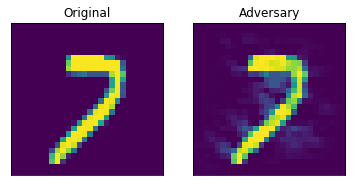

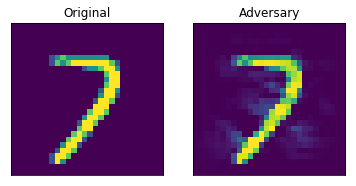

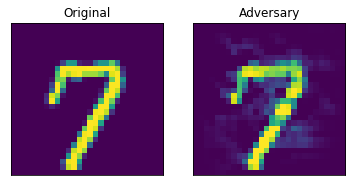

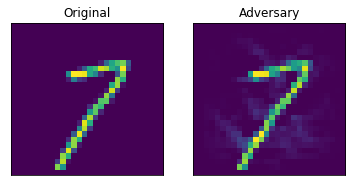

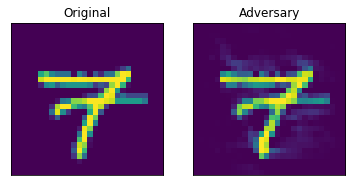

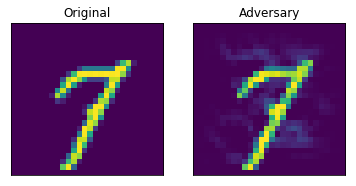

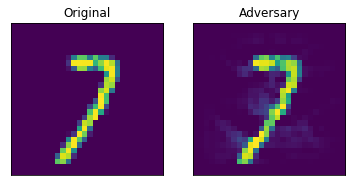

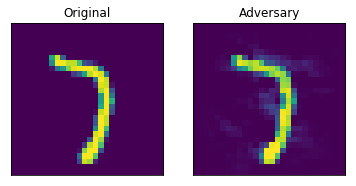

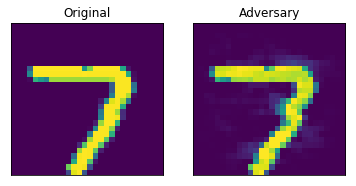

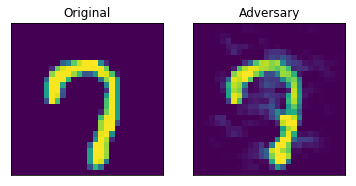

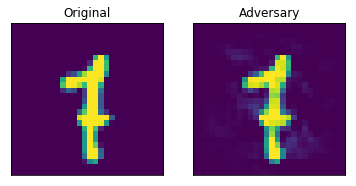

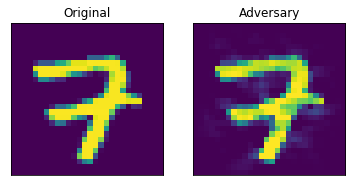

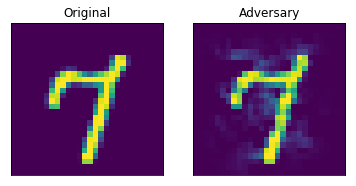

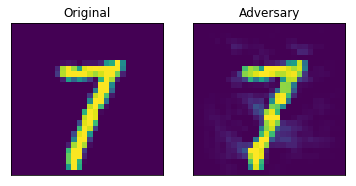

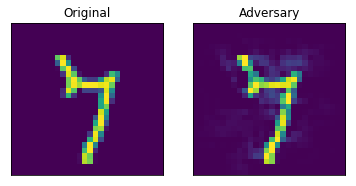

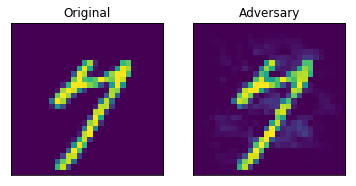

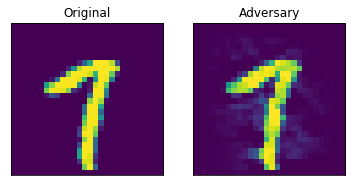

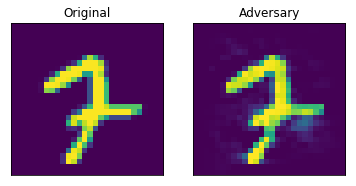

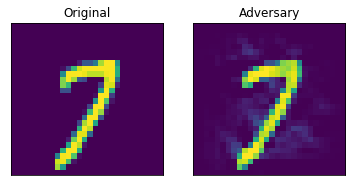

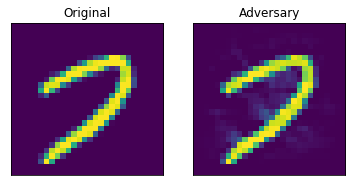

In [10]:
sample_batch = iter(adv_data).next()

originals = sample_batch[0]
adversaries = sample_batch[2]

for i in range(20):
    plt.subplot(1,2,1)
    plt.imshow(originals[i][0].numpy())
    plt.title('Original')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1,2,2)
    plt.imshow(adversaries[i][0].numpy())
    plt.title('Adversary')
    plt.xticks([])
    plt.yticks([])
    plt.show()

### CIFAR

In [ ]:
adv_data = utils.get_adv_data('cifar_eps_5e-3', original_label=1, target_label=9)

#### Plot a few examples

In [ ]:
sample_batch = iter(adv_data).next()

originals = sample_batch[0]
adversaries = sample_batch[2]

for i in range(20):
    plt.subplot(1,2,1)
    plt.imshow(originals[i].numpy().transpose((1,2,0)))
    plt.title('Original')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1,2,2)
    plt.imshow(adversaries[i].numpy().transpose((1,2,0)))
    plt.title('Adversary')
    plt.xticks([])
    plt.yticks([])
    plt.show()